# Student Performance Prediction Project
## 1. Introduction
## 2. Data Loading
## 3. Data Exploration
## 4. Data Visualization
## 5. Data Preprocessing
## 6. Model Building
## 7. Model Evaluation
## 8. Conclusion

# Student Performance Prediction Project
## 1. Introduction
## 2. Data Loading
## 3. Data Exploration
## 4. Data Visualization
## 5. Data Preprocessing
## 6. Model Building
## 7. Model Evaluation
## 8. Conclusion

### 🎓 Project Title: Student Performance Prediction

*Objective:* Predict students' math scores based on demographic and academic factors using a Linear Regression model.

*Tech Stack:* Python, Pandas, Seaborn, Matplotlib, Scikit-Learn, Jupyter Notebook

*Key Steps:*
- Loaded & cleaned a real-world dataset
- Visualized trends and feature relationships
- Encoded categorical data
- Trained & evaluated a regression model
- Visualized predictions

*Outcome:* Achieved a reasonable R² score for predicting student math performance. This project demonstrates data cleaning, feature engineering, model building, and evaluation skills.

In [2]:
import pandas as pd
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       10 non-null     object
 1   race/ethnicity               10 non-null     object
 2   parental level of education  10 non-null     object
 3   lunch                        10 non-null     object
 4   test preparation course      10 non-null     object
 5   math score                   10 non-null     int64 
 6   reading score                10 non-null     int64 
 7   writing score                10 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 772.0+ bytes


In [4]:
df.describe()

,math score,reading score,writing score
count,10.000000,10.00000,10.000000
mean,65.500000,73.70000,70.000000
std,18.416478,17.58819,19.686431
min,38.000000,43.00000,39.000000
25%,51.250000,61.00000,54.250000
50%,70.000000,75.00000,74.500000
75%,75.000000,88.25000,85.500000
max,90.000000,95.00000,93.000000


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

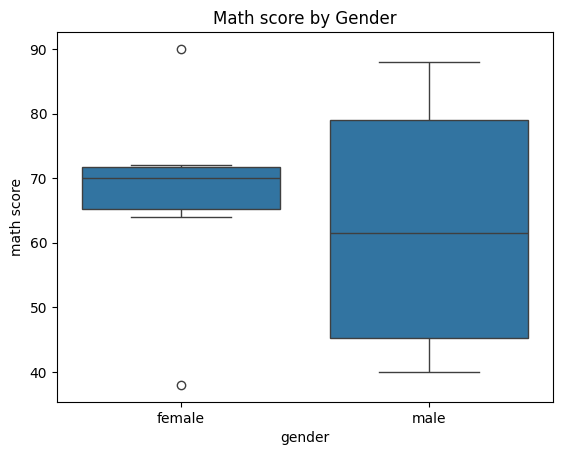

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = 'gender' , y = 'math score', data = df)
plt.title("Math score by Gender")
plt.show()

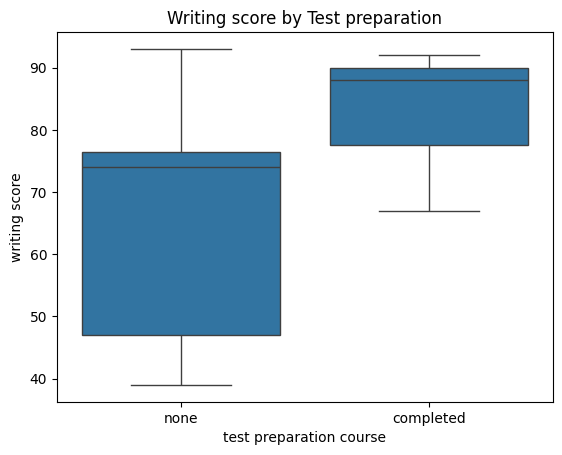

In [9]:
sns.boxplot(x='test preparation course',y='writing score',data =df)
plt.title("Writing score by Test preparation")
plt.show()

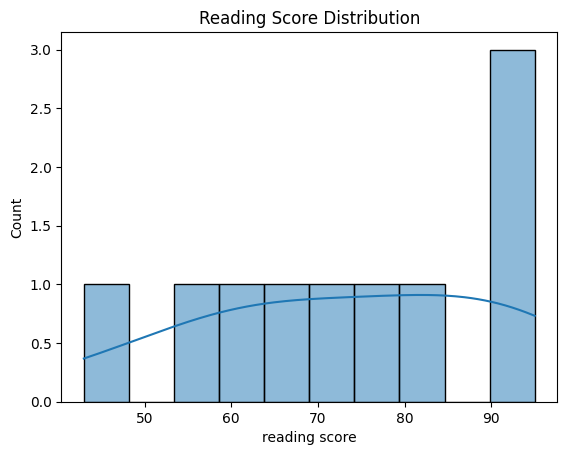

In [12]:
sns.histplot(df['reading score'],bins = 10, kde = True)
plt.title("Reading Score Distribution")
plt.show()

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Reload original data (if needed)
df = pd.read_csv("StudentsPerformance.csv")

# Make a copy to avoid changing the original
df_encoded = df.copy()

# Columns that need to be encoded
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Apply Label Encoding correctly
for col in cat_cols:
    encoder = LabelEncoder()
    df_encoded[col] = encoder.fit_transform(df_encoded[col].astype(str))  # .astype(str) ensures it's readable

# Show the encoded dataframe
df_encoded.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 🎯 Define features and target
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

# 🧪 Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔍 Make predictions
y_pred = model.predict(X_test)

# 📊 Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 1661.70
R-squared Score: -264.87


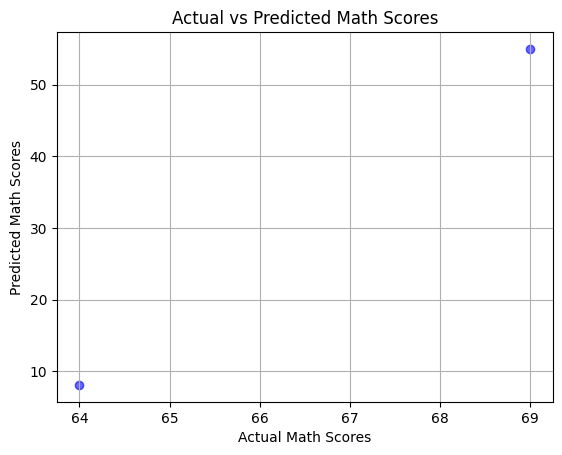

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()